# Import Library

In [ ]:
!pip install hurst

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Data Collecting (BBCA & ANTM)

In [ ]:
saham1 = "BBCA.JK"
saham2 = "ANTM.JK"

# Ambil data dari 5 Mei 2023 sampai 5 Mei 2025
start_date = "2023-05-05"
end_date = "2025-05-05"

data1 = yf.download(saham1, start=start_date, end=end_date)
data2 = yf.download(saham2, start=start_date, end=end_date)

# Simpan ke CSV
data1.to_csv(f"{saham1}.csv")
data2.to_csv(f"{saham2}.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Cek data awal
print(data1.head())
print(data2.head())

Price             Close         High          Low         Open    Volume
Ticker          BBCA.JK      BBCA.JK      BBCA.JK      BBCA.JK   BBCA.JK
Date                                                                    
2023-05-05  8451.989258  8498.944754  8405.033762  8451.989258  64815100
2023-05-08  8451.989258  8522.422502  8405.033762  8451.989258  84754500
2023-05-09  8381.556641  8428.512140  8358.078891  8405.034390  40929600
2023-05-10  8381.556641  8405.034390  8358.078891  8381.556641  45322600
2023-05-11  8287.645508  8358.078756  8264.167758  8358.078756  81993900
Price             Close         High          Low         Open    Volume
Ticker          ANTM.JK      ANTM.JK      ANTM.JK      ANTM.JK   ANTM.JK
Date                                                                    
2023-05-05  1807.691528  1887.442625  1789.969062  1887.442625  65433100
2023-05-08  1834.275391  1851.997858  1807.691689  1825.414157  29706800
2023-05-09  1869.720215  1878.581448  1834.275282  

# EDA

In [ ]:
# Buat ngecek informasi umum
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 472 entries, 2023-05-05 to 2025-05-02
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BBCA.JK)   472 non-null    float64
 1   (High, BBCA.JK)    472 non-null    float64
 2   (Low, BBCA.JK)     472 non-null    float64
 3   (Open, BBCA.JK)    472 non-null    float64
 4   (Volume, BBCA.JK)  472 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 22.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 472 entries, 2023-05-05 to 2025-05-02
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ANTM.JK)   472 non-null    float64
 1   (High, ANTM.JK)    472 non-null    float64
 2   (Low, ANTM.JK)     472 non-null    float64
 3   (Open, ANTM.JK)    472 non-null    float64
 4   (Volume, ANTM.JK)  472 non-null    int64  
dtypes: float64(4), int64(

In [ ]:
# Statistik deskriptif
print(data1.describe())
print(data2.describe())

Price          Close          High           Low          Open        Volume
Ticker       BBCA.JK       BBCA.JK       BBCA.JK       BBCA.JK       BBCA.JK
count     472.000000    472.000000    472.000000    472.000000  4.720000e+02
mean     9092.569971   9170.397985   9021.511639   9095.034962  8.478565e+07
std       622.966932    624.300274    615.499982    622.579083  6.578163e+07
min      7775.000000   7950.000000   7275.000000   7400.000000  2.082770e+07
25%      8545.901367   8616.333321   8498.945312   8548.975342  5.334362e+07
50%      9025.878906   9101.964355   8940.521790   9025.878357  7.104100e+07
75%      9604.477539   9701.612467   9537.973896   9652.984981  9.465565e+07
max     10570.414062  10570.414456  10401.480891  10522.147296  7.564316e+08
Price         Close         High          Low         Open        Volume
Ticker      ANTM.JK      ANTM.JK      ANTM.JK      ANTM.JK       ANTM.JK
count    472.000000   472.000000   472.000000   472.000000  4.720000e+02
mean    156

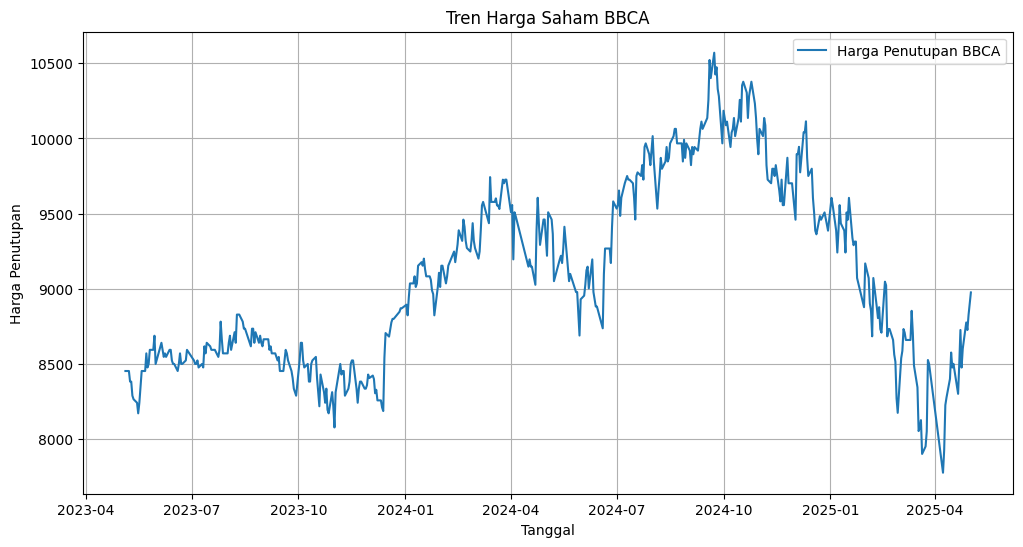

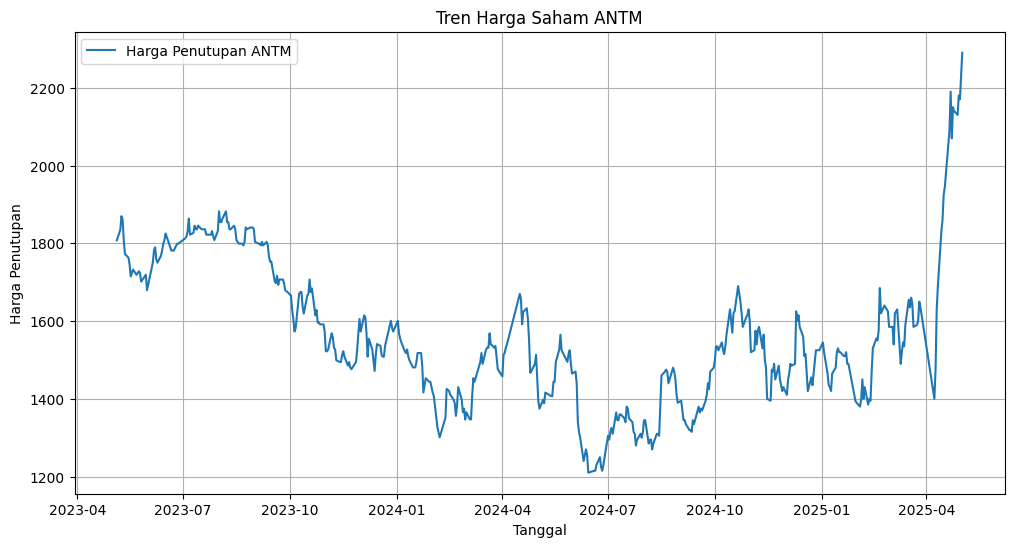

In [ ]:
# Visualisasi Tren Harga Saham
plt.figure(figsize=(12, 6))
plt.plot(data1['Close'], label='Harga Penutupan BBCA')
plt.title('Tren Harga Saham BBCA')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data2['Close'], label='Harga Penutupan ANTM')
plt.title('Tren Harga Saham ANTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.grid(True)
plt.show()

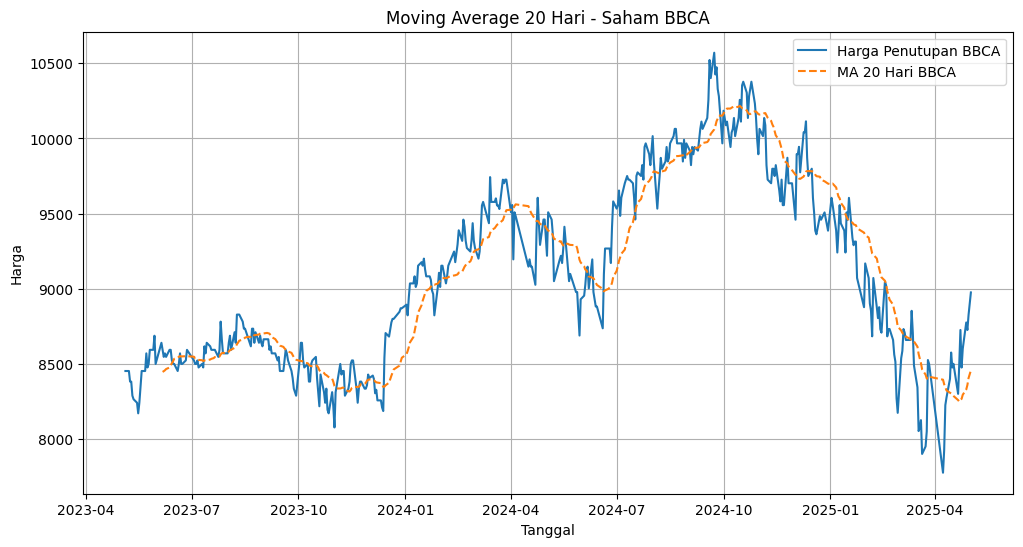

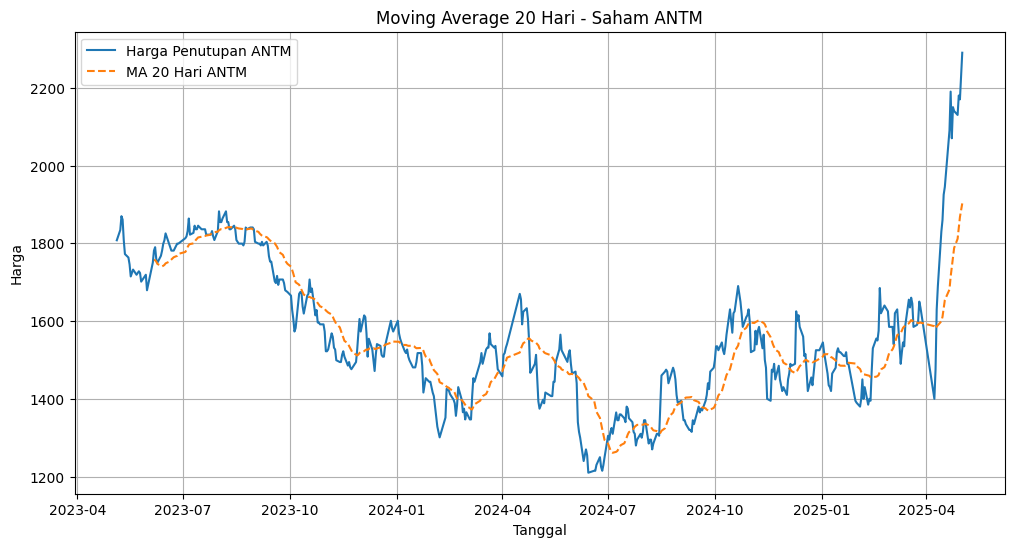

In [ ]:
# Visualisasi Moving Average (20 Hari)
data1['MA 20 Hari'] = data1['Close'].rolling(window=20).mean()
data2['MA 20 Hari'] = data2['Close'].rolling(window=20).mean()

plt.figure(figsize=(12, 6))
plt.plot(data1['Close'], label='Harga Penutupan BBCA')
plt.plot(data1['MA 20 Hari'], label='MA 20 Hari BBCA', linestyle='--')
plt.title('Moving Average 20 Hari - Saham BBCA')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data2['Close'], label='Harga Penutupan ANTM')
plt.plot(data2['MA 20 Hari'], label='MA 20 Hari ANTM', linestyle='--')
plt.title('Moving Average 20 Hari - Saham ANTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

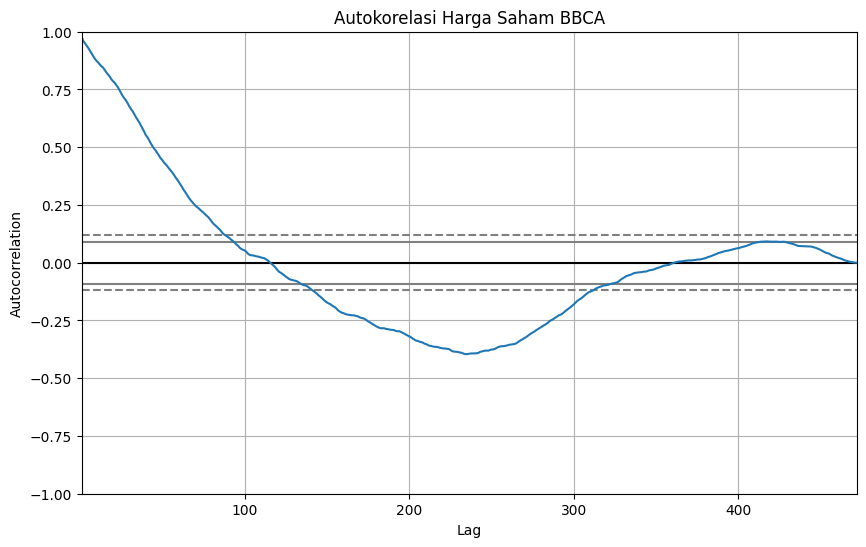

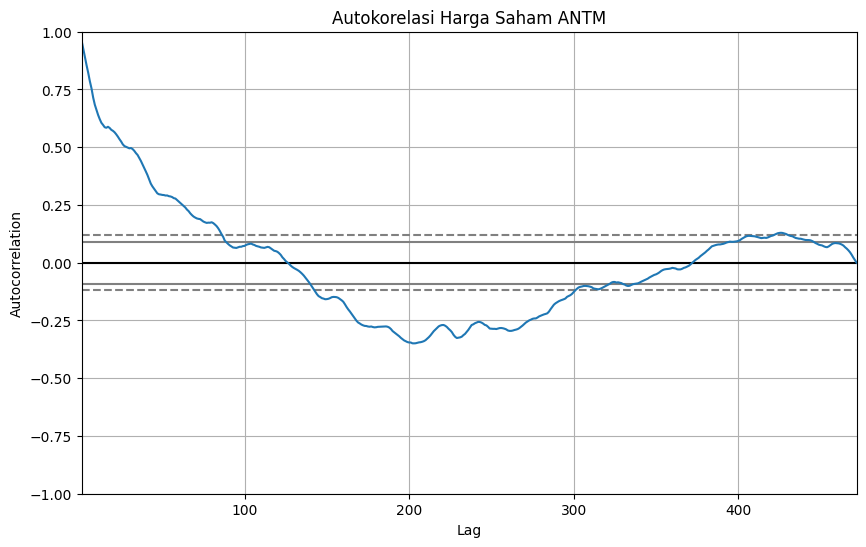

In [ ]:
# Cek Autokorelasi
plt.figure(figsize=(10, 6))
autocorrelation_plot(data1['Close'])
plt.title('Autokorelasi Harga Saham BBCA')
plt.show()

plt.figure(figsize=(10, 6))
autocorrelation_plot(data2['Close'])
plt.title('Autokorelasi Harga Saham ANTM')
plt.show()

# Preprocessing

In [ ]:
# Definisikan nama kolom sesuai struktur data saham
kolom = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Lewati 2 baris pertama, lalu tetapkan nama kolom
data1 = pd.read_csv("BBCA.JK.csv", skiprows=2, names=kolom, header=None)
data2 = pd.read_csv("ANTM.JK.csv", skiprows=2, names=kolom, header=None)

# Cek data awal
print(data1.head())
print(data2.head())

         Date        Close         High          Low         Open      Volume
0        Date          NaN          NaN          NaN          NaN         NaN
1  2023-05-05  8451.989258  8498.944754  8405.033762  8451.989258  64815100.0
2  2023-05-08  8451.989258  8522.422502  8405.033762  8451.989258  84754500.0
3  2023-05-09  8381.556641  8428.512140  8358.078891  8405.034390  40929600.0
4  2023-05-10  8381.556641  8405.034390  8358.078891  8381.556641  45322600.0
         Date        Close         High          Low         Open      Volume
0        Date          NaN          NaN          NaN          NaN         NaN
1  2023-05-05  1807.691528  1887.442625  1789.969062  1887.442625  65433100.0
2  2023-05-08  1834.275391  1851.997858  1807.691689  1825.414157  29706800.0
3  2023-05-09  1869.720215  1878.581448  1834.275282  1843.136515  38860300.0
4  2023-05-10  1860.859009  1878.581476  1834.275309  1869.720242  29596100.0


In [ ]:
# Cek Missing Values
print("Missing Values BBCA:")
print(data1.isnull().sum())

print("\nMissing Values ANTM:")
print(data2.isnull().sum())

Missing Values BBCA:
Date      0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64

Missing Values ANTM:
Date      0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


In [ ]:
kolom_numerik = ['Close', 'High', 'Low', 'Open', 'Volume']

for kolom in kolom_numerik:
    data1[kolom] = pd.to_numeric(data1[kolom], errors='coerce')
    data2[kolom] = pd.to_numeric(data2[kolom], errors='coerce')

In [ ]:
# Hapus baris yang punya NaN
data1_clean = data1.dropna().copy()
data2_clean = data2.dropna().copy()

data1_clean.sort_values('Date', inplace=True)
data2_clean.sort_values('Date', inplace=True)

data1_clean.reset_index(drop=True, inplace=True)
data2_clean.reset_index(drop=True, inplace=True)

In [ ]:
print("BBCA Cleaned:")
print(data1_clean.head())

print("\nANTM Cleaned:")
print(data2_clean.head())

BBCA Cleaned:
         Date        Close         High          Low         Open      Volume
0  2023-05-05  8451.989258  8498.944754  8405.033762  8451.989258  64815100.0
1  2023-05-08  8451.989258  8522.422502  8405.033762  8451.989258  84754500.0
2  2023-05-09  8381.556641  8428.512140  8358.078891  8405.034390  40929600.0
3  2023-05-10  8381.556641  8405.034390  8358.078891  8381.556641  45322600.0
4  2023-05-11  8287.645508  8358.078756  8264.167758  8358.078756  81993900.0

ANTM Cleaned:
         Date        Close         High          Low         Open      Volume
0  2023-05-05  1807.691528  1887.442625  1789.969062  1887.442625  65433100.0
1  2023-05-08  1834.275391  1851.997858  1807.691689  1825.414157  29706800.0
2  2023-05-09  1869.720215  1878.581448  1834.275282  1843.136515  38860300.0
3  2023-05-10  1860.859009  1878.581476  1834.275309  1869.720242  29596100.0
4  2023-05-11  1807.691528  1843.136460  1798.830295  1843.136460  60984800.0


In [ ]:
# Simpan versi bersih ke file baru
data1_clean.to_csv("BBCA_cleaned.csv", index=False)
data2_clean.to_csv("ANTM_cleaned.csv", index=False)

# Scaling Data

Normalisasi (Scaling Data) dengan MinMaxScaler

In [ ]:
# Buat scaler terpisah
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

# Transformasi data BBCA dan ANTM secara terpisah
data1_clean['Close Scaled'] = scaler1.fit_transform(data1_clean[['Close']])
data2_clean['Close Scaled'] = scaler2.fit_transform(data2_clean[['Close']])

In [ ]:
print("BBCA Scaled Min:", data1_clean['Close Scaled'].min())
print("BBCA Scaled Max:", data1_clean['Close Scaled'].max())

print("ANTM Scaled Min:", data2_clean['Close Scaled'].min())
print("ANTM Scaled Max:", data2_clean['Close Scaled'].max())

BBCA Scaled Min: 0.0
BBCA Scaled Max: 1.0
ANTM Scaled Min: 0.0
ANTM Scaled Max: 0.9999999999999998


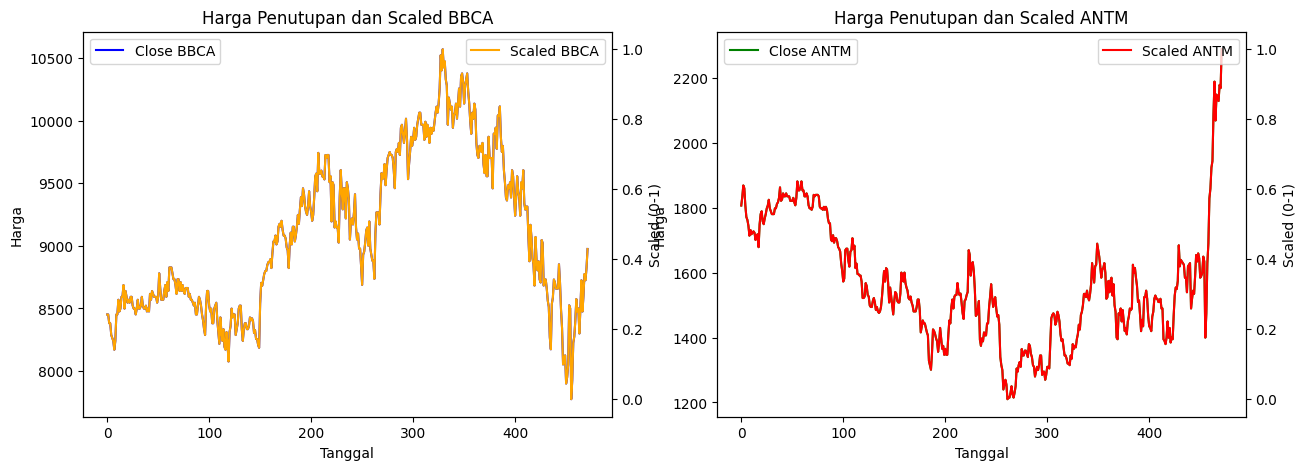

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Plot BBCA
ax1 = axs[0]
ax1.plot(data1_clean.index, data1_clean['Close'], color='blue', label='Close BBCA')
ax2 = ax1.twinx()
ax2.plot(data1_clean.index, data1_clean['Close Scaled'], color='orange', label='Scaled BBCA')
ax1.set_title('Harga Penutupan dan Scaled BBCA')
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Harga')
ax2.set_ylabel('Scaled (0-1)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot ANTM
ax3 = axs[1]
ax3.plot(data2_clean.index, data2_clean['Close'], color='green', label='Close ANTM')
ax4 = ax3.twinx()
ax4.plot(data2_clean.index, data2_clean['Close Scaled'], color='red', label='Scaled ANTM')
ax3.set_title('Harga Penutupan dan Scaled ANTM')
ax3.set_xlabel('Tanggal')
ax3.set_ylabel('Harga')
ax4.set_ylabel('Scaled (0-1)')
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

plt.show()

In [ ]:
# Descriptive Statistics untuk data setelah preprocessing
print("\nDescriptive Statistics BBCA setelah Preprocessing:")
print(data1_clean.describe())

print("\nDescriptive Statistics ANTM setelah Preprocessing:")
print(data2_clean.describe())


Descriptive Statistics BBCA setelah Preprocessing:
              Close          High           Low          Open        Volume  \
count    472.000000    472.000000    472.000000    472.000000  4.720000e+02   
mean    9092.569971   9170.397985   9021.511639   9095.034962  8.478565e+07   
std      622.966932    624.300274    615.499982    622.579083  6.578163e+07   
min     7775.000000   7950.000000   7275.000000   7400.000000  2.082770e+07   
25%     8545.901367   8616.333321   8498.945312   8548.975342  5.334362e+07   
50%     9025.878906   9101.964355   8940.521790   9025.878357  7.104100e+07   
75%     9604.477539   9701.612467   9537.973896   9652.984981  9.465565e+07   
max    10570.414062  10570.414456  10401.480891  10522.147296  7.564316e+08   

       Close Scaled  
count    472.000000  
mean       0.471333  
std        0.222853  
min        0.000000  
25%        0.275774  
50%        0.447475  
75%        0.654457  
max        1.000000  

Descriptive Statistics ANTM setelah P

# Splitting Data

In [ ]:
def create_windowed_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

# 3. Ambil kolom harga yang sudah discaling
scaled_bbca = data1_clean['Close Scaled'].values
scaled_antm = data2_clean['Close Scaled'].values

# 4. Splitting dulu baru windowing
window_size = 20
train_size_bbca = int(len(scaled_bbca) * 0.8)
train_data_bbca = scaled_bbca[:train_size_bbca]
test_data_bbca = scaled_bbca[train_size_bbca - window_size:]

train_size_antm = int(len(scaled_antm) * 0.8)
train_data_antm = scaled_antm[:train_size_antm]
test_data_antm = scaled_antm[train_size_antm - window_size:]

# Windowing Data

In [ ]:
X_train_bbca, y_train_bbca = create_windowed_dataset(train_data_bbca, window_size)
X_test_bbca, y_test_bbca = create_windowed_dataset(test_data_bbca, window_size)

X_train_antm, y_train_antm = create_windowed_dataset(train_data_antm, window_size)
X_test_antm, y_test_antm = create_windowed_dataset(test_data_antm, window_size)

X_train_bbca = X_train_bbca.reshape((X_train_bbca.shape[0], X_train_bbca.shape[1], 1))
X_test_bbca = X_test_bbca.reshape((X_test_bbca.shape[0], X_test_bbca.shape[1], 1))

X_train_antm = X_train_antm.reshape((X_train_antm.shape[0], X_train_antm.shape[1], 1))
X_test_antm = X_test_antm.reshape((X_test_antm.shape[0], X_test_antm.shape[1], 1))

# Modeling

In [ ]:
def create_lstm_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True),
        tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model_bbca = create_lstm_model((window_size, 1))
model_bbca.fit(X_train_bbca, y_train_bbca, epochs=50, batch_size=32, verbose=1)

model_antm = create_lstm_model((window_size, 1))
model_antm.fit(X_train_antm, y_train_antm, epochs=50, batch_size=32, verbose=1)

y_pred_bbca = model_bbca.predict(X_test_bbca)
y_pred_antm = model_antm.predict(X_test_antm)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.2606
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0908
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0226
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0127
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0081
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0062
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0054
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0050
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0045
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0048
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0046
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0048
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0044
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0043
Epoc

# Evaluasi Model

In [ ]:
mae_bbca = mean_absolute_error(y_test_bbca, y_pred_bbca)
mse_bbca = mean_squared_error(y_test_bbca, y_pred_bbca)
rmse_bbca = np.sqrt(mse_bbca)

print(f"BBCA - MAE: {mae_bbca}, MSE: {mse_bbca}, RMSE: {rmse_bbca}")

mae_antm = mean_absolute_error(y_test_antm, y_pred_antm)
mse_antm = mean_squared_error(y_test_antm, y_pred_antm)
rmse_antm = np.sqrt(mse_antm)

print(f"ANTM - MAE: {mae_antm}, MSE: {mse_antm}, RMSE: {rmse_antm}")

BBCA - MAE: 0.07393014430999756, MSE: 0.007983039133250713, RMSE: 0.08934785466507135
ANTM - MAE: 0.06722547858953476, MSE: 0.00884601753205061, RMSE: 0.09405326965103664


# Visualisasi

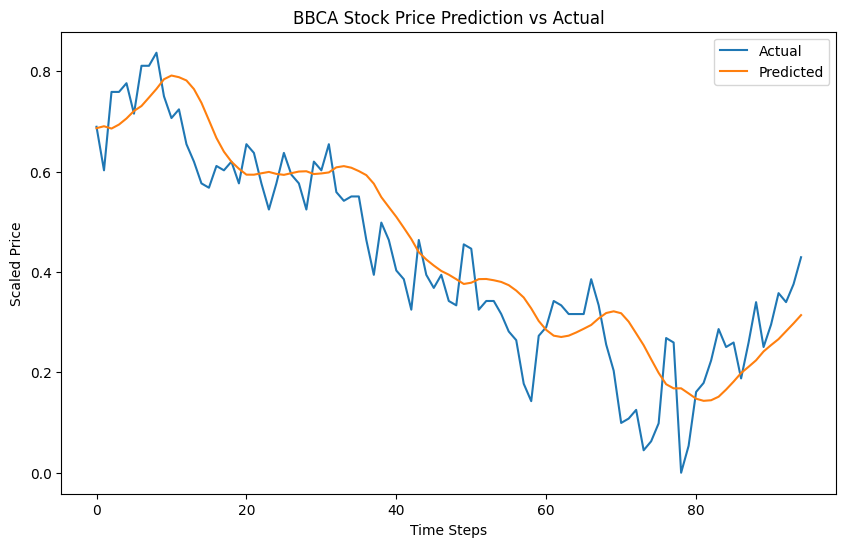

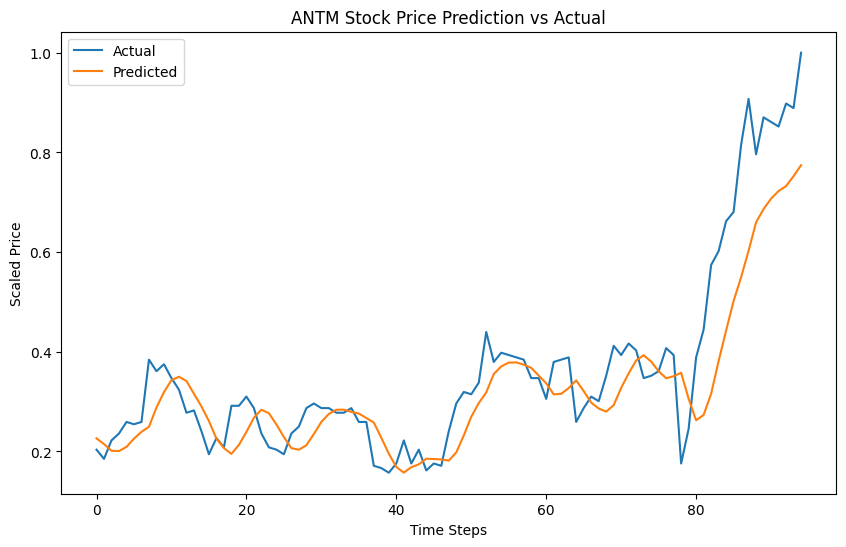

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_bbca, label='Actual')
plt.plot(y_pred_bbca, label='Predicted')
plt.title('BBCA Stock Price Prediction vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test_antm, label='Actual')
plt.plot(y_pred_antm, label='Predicted')
plt.title('ANTM Stock Price Prediction vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()